# EDA NYC Airbnb data

The present notebook aim to explore the dataset provided, looking for outliers, understand distributions, missing data and validate data types (i.e. dates, floats, etc)

### imports and reading data

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import wandb
import pandas as pd
import pandas_profiling

run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)
local_path = wandb.use_artifact("sample.csv:latest").file()
df = pd.read_csv(local_path)

wandb: Currently logged in as: pedroberaldo (use `wandb login --relogin` to force relogin)
/Users/pedroberaldo/opt/anaconda3/envs/nyc_airbnb_dev/lib/python3.9/site-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "
wandb: wandb version 0.13.9 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


## Profiling

In [3]:
profile = pandas_profiling.ProfileReport(df)
profile.to_widgets()

NameError: name 'pandas_profiling' is not defined

In [9]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

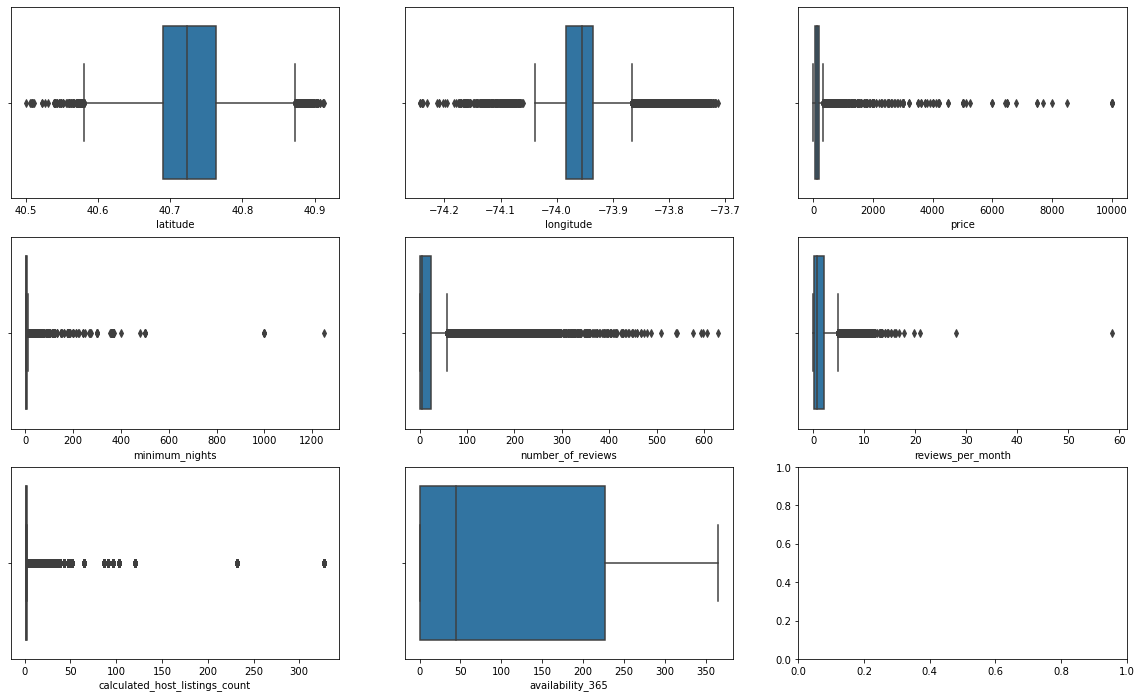

In [13]:
numeric_columns = [
    'latitude',
    'longitude',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

fig, axes = plt.subplots(3, 3, figsize=(20, 12))
axes = [axes[i][j] for i in range(3) for j in range(3)]

for i, col in zip(range(3 * 3), numeric_columns):
        sns.boxplot(x=col, ax=axes[i], data=df)

We can see that _price_, _minimum_nights_ and _calculated_host_listings_count_ appear to have outliers!

<ipython-input-44-4082fc1bb551>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.calculated_host_listings_count)


<AxesSubplot:xlabel='calculated_host_listings_count', ylabel='Density'>

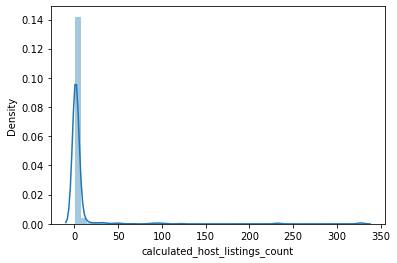

In [44]:
sns.distplot(df.calculated_host_listings_count)

In [42]:
df.calculated_host_listings_count.max()

327

In [45]:
q_host_listings = df['calculated_host_listings_count'].quantile(0.99)

<ipython-input-29-23a9c217de78>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.minimum_nights)


<AxesSubplot:xlabel='minimum_nights', ylabel='Density'>

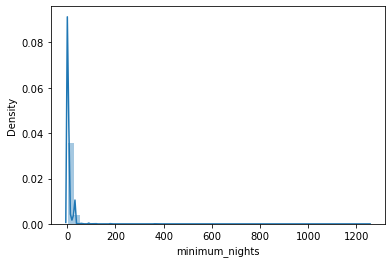

In [29]:
sns.distplot(df.minimum_nights)

In [19]:
df.minimum_nights.max()

1250

In [46]:
q_minimum_nights = df["minimum_nights"].quantile(0.99)

## Data Cleaning

In [56]:
df = df.query("@min_price <= price <= @max_price and \
            minimum_nights < @q_minimum_nights and \
            calculated_host_listings_count < @q_host_listings").copy()

In [52]:
# Drop outliers
min_price = 10
max_price = 350
df = df.query("@min_price <= price <= @max_price and \
            minimum_nights < @q_minimum_nights and calculated_host_listings_count < @q_host_listings").copy()
# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45408 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              45408 non-null  int64         
 1   name                            45393 non-null  object        
 2   host_id                         45408 non-null  int64         
 3   host_name                       45387 non-null  object        
 4   neighbourhood_group             45408 non-null  object        
 5   neighbourhood                   45408 non-null  object        
 6   latitude                        45408 non-null  float64       
 7   longitude                       45408 non-null  float64       
 8   room_type                       45408 non-null  object        
 9   price                           45408 non-null  int64         
 10  minimum_nights                  45408 non-null  int64         
 11  nu

In [54]:
run.finish()